In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Reading in dataframe
df = pd.read_csv('../data/taxi2022.csv')

#Setting the req_index column as the index
df.set_index('req_index', inplace=True)

#Converting the index to datetime
df.index = pd.to_datetime(df.index, format= '%Y-%m-%d')

#Checking the dtypes
df.dtypes

PULocationID            float64
DOLocationID            float64
trip_miles              float64
base_passenger_fare     float64
tips                    float64
driver_pay              float64
congestion_surcharge    float64
req_time                 object
req_date                 object
pickup_time              object
dropoff_date             object
dropoff_time             object
temp                    float64
preciptype                int64
zone                     object
borough                   int64
dtype: object

In [37]:
#Looking to see if anything seems weird
df.describe()

,PULocationID,DOLocationID,trip_miles,base_passenger_fare,tips,driver_pay,congestion_surcharge,temp,preciptype,borough
count,3.975858e+06,3.975858e+06,3.975858e+06,3.975858e+06,3.975858e+06,3.975858e+06,3.975858e+06,3.975858e+06,3.975858e+06,3.975858e+06
mean,1.388804e+02,1.425236e+02,5.082325e+00,2.368941e+01,1.096066e+00,1.868563e+01,1.056550e+00,5.722610e+01,8.456776e-01,2.640150e+00
std,7.486002e+01,7.774033e+01,5.885739e+00,1.985214e+01,3.061492e+00,1.536080e+01,1.340531e+00,1.754741e+01,1.031638e+00,1.028340e+00
min,2.000000e+00,1.000000e+00,0.000000e+00,-1.053600e+02,0.000000e+00,-6.705000e+01,0.000000e+00,1.660000e+01,0.000000e+00,0.000000e+00
25%,7.500000e+01,7.600000e+01,1.620000e+00,1.143000e+01,0.000000e+00,8.800000e+00,0.000000e+00,4.320000e+01,0.000000e+00,2.000000e+00
50%,1.400000e+02,1.410000e+02,3.040000e+00,1.808000e+01,0.000000e+00,1.432000e+01,0.000000e+00,5.770000e+01,1.000000e+00,2.000000e+00
75%,2.110000e+02,2.170000e+02,6.340000e+00,2.911000e+01,0.000000e+00,2.339000e+01,2.750000e+00,7.290000e+01,1.000000e+00,4.000000e+00
max,2.650000e+02,2.650000e+02,4.642000e+02,1.448910e+03,1.678500e+02,1.088710e+03,5.500000e+00,8.740000e+01,6.000000e+00,5.000000e+00


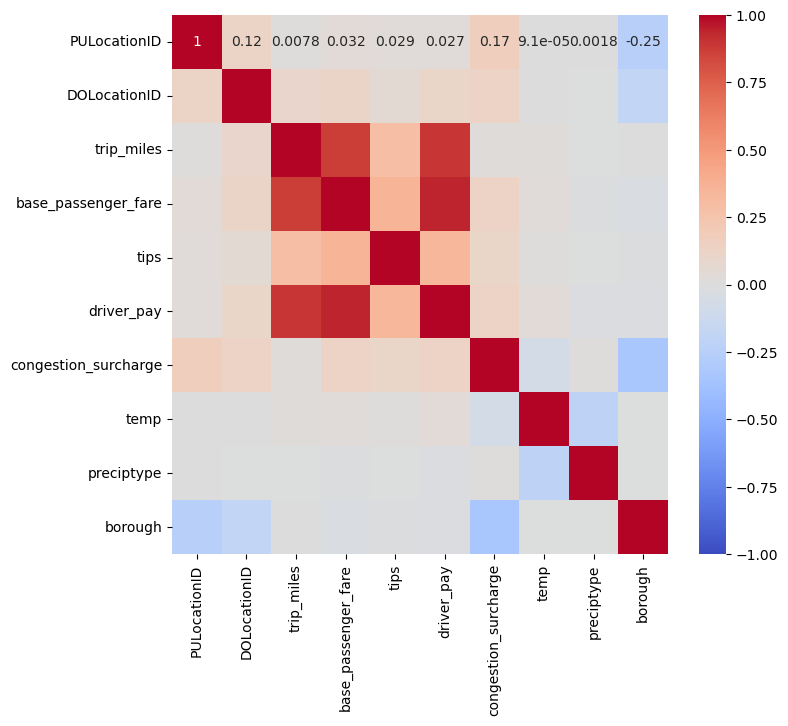

In [67]:
#Taking a look at correlations between features
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

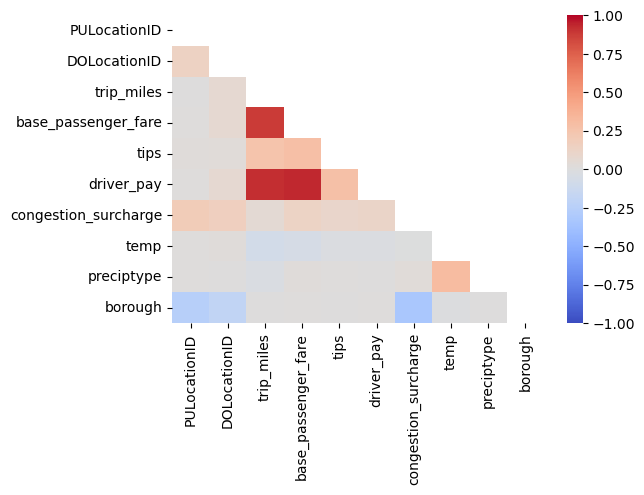

In [70]:
#Seeing if this changes at all by month

#Looking and plotting just january data
jan = df.loc['2022-01']
jan_corr = jan.corr(numeric_only=True)

plt.figure(figsize=(6,4))
mask = np.triu(np.ones_like(jan_corr, dtype=bool))
sns.heatmap(jan_corr, annot=True, vmin=-1, vmax=1, mask=mask, fmt=".1f", cmap='coolwarm');

In [90]:
#How much, on average, does a driver make per trip by per month
df['driver_pay'].resample("ME")

<BarContainer object of 12 artists>

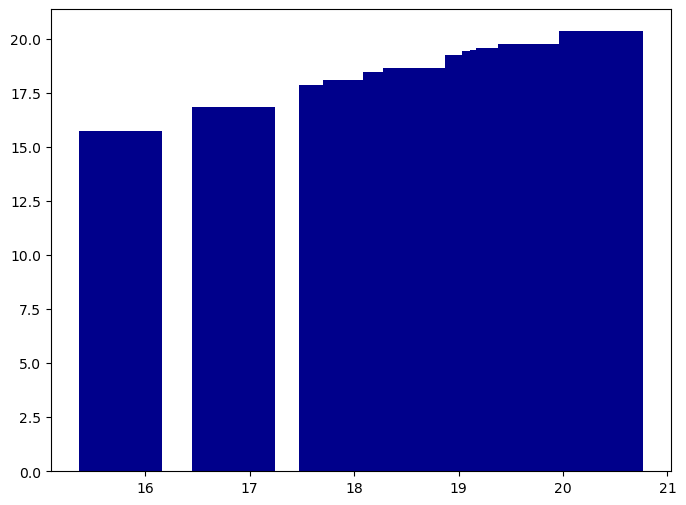

In [92]:
plt.figure(figsize=(8,6))
plt.bar(df['driver_pay'].resample("ME").mean(), df['driver_pay'].resample("ME").mean(),  color='darkblue')